# look at a corrupted binary SST file

In [1]:
import os, sys
import numpy as np
import dask
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

#from mitequinox.utils import *
from mitequinox.binary import *

In [2]:
from dask_jobqueue import PBSCluster
#cluster = PBSCluster(cores=1)
cluster = PBSCluster(cores=8, processes=1,memory='20GB')
w = cluster.scale(2) # postprocessing

In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

Client Scheduler: tcp://10.135.39.56:54658 Dashboard: http://10.135.39.56:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [5]:
data_dir = '/home/mp/pontea/'
grid_dir = '/work/ALT/swot/swotpub/LLC4320/bin/grid/'
iters=[290592]
ds = get_compressed_data('SST', data_dir, grid_dir, ds_index=None, ds=None, iters=iters,
                         client=client, k=0, point='C')

/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in . Using default version.
  "in %s. Using default version." % data_dir)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


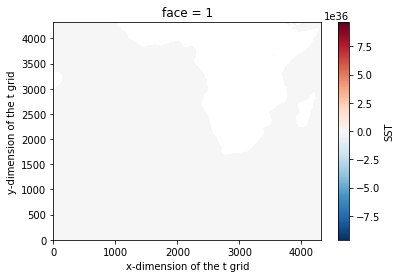

In [8]:
ds.SST.isel(face=1).plot()

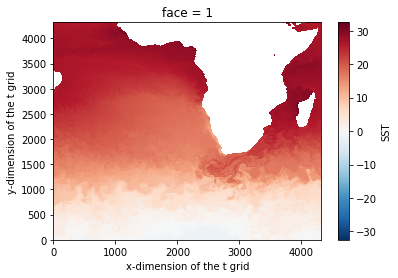

In [13]:
ds.SST.where(np.abs(ds.SST)<1e2).isel(face=1).plot()

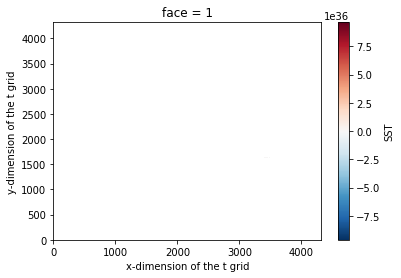

In [14]:
ds.SST.where(np.abs(ds.SST)>1e2).isel(face=1).plot()

In [10]:
cluster.close()